# 图像特效-球面效果

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/sunset2.jpg')
gray = cv2.imread('../datas/sunset2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [3]:
def spherize_filter(src,cenX,cenY):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    rows,cols = srcf.shape[0],srcf.shape[1]
    radius = 0.
    radian = 0.
    for y in range(rows):
        for x in range(cols):
            offsetX = x - cenX
            offsetY = y - cenY
            radian = math.atan2(offsetY,offsetX)
            radius = (offsetX ** 2 + offsetY ** 2) / max(cenX,cenY)
            newX = radius * np.cos(radian) + cenX
            newY = radius * np.sin(radian) + cenY
            newX = int(min(cols - 1,newX))
            newY = int(min(rows - 1,newY))
            dst[y,x] = src[newY,newX]
            
    return np.uint8(dst)
            

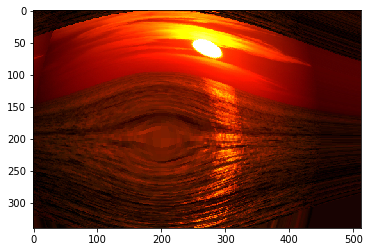

In [6]:
dst = spherize_filter(rgb,200,200)
plt.imshow(dst)